# Keplan meier analysis 

In [1]:
from lifelines.datasets import load_rossi
from lifelines import KaplanMeierFitter

import pandas as pd


we prepared sample dataset from our datastore of around 10 million ids and set our bencharks on the same

In [4]:
df = pd.read_json("../input.json" , lines=  True)

In [5]:
df["new_col"] = df["life"]/df["frequency_of_appearence_in_days"]
df["mean_val_column"] = df.new_col.astype("int")
df.drop("new_col" , axis=1 , inplace = True)
df["censored"]=1

In [13]:
import numpy as np
# numpy.unique(df["DeviceOS_value"].values)


In [6]:
df

,DeviceOS_value,IAB,age,dp_ct,frequency_app_update,frequency_of_appearence_in_days,gender,id,life,max_hop,max_val,mean_hop,min_val,mean_val_column,censored
0,android,{},-1,3,0,7,Unknown,000174f2-5996-4c0f-9e88-ac6dd089c214,459,160,491,76,32,65,1
1,android,{},-1,1,0,34,Unknown,0002ef1a-ae5b-4144-ba6e-8aeddb9e3426,498,50,640,15,142,14,1
2,android,NaN,-1,1,0,7,Unknown,000343f5-26d7-49d1-a3b8-25fe84f04105,330,280,332,47,2,47,1
3,Android,"{'IAB19': 213, 'IAB22': 213, 'IAB3': 213, 'IAB...",-1,4,0,37,Male,0003d0d5-beaa-4876-b382-adfd43ea45a2,458,39,640,12,182,12,1
4,android,"{'IAB12': 213, 'IAB22': 213, 'IAB3': 213}",50,2,0,6,Unknown,00077668-d459-4de6-b0e1-e57d2e8e4443,90,30,112,18,22,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927378,android,{},18,3,1,7,Unknown,fff8fdf1-a0c2-4ad3-af3f-9d00f05540b0,60,10,92,10,32,8,1
9927379,android,"{'IAB1': 213, 'IAB10': 213, 'IAB14': 213, 'IAB...",25,3,11,46,Unknown,fff94b0e-f58b-4a22-a01c-cb010586aecf,579,70,581,12,2,12,1
9927380,Android,{},-1,3,0,11,Unknown,fffce6dd-689d-4207-97ed-0580ff64af9f,449,120,451,40,2,40,1
9927381,android,"{'IAB301': 624, 'IAB308_3': 624, 'IAB318_8': 6...",18,5,1,9,Male,fffe21de-a405-46a0-ab64-6953d57f74c3,329,259,481,41,152,36,1


eval($ACTIVE_{MIN}$)

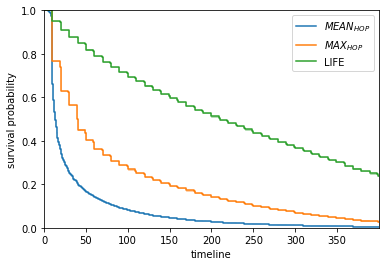

In [31]:
from lifelines.statistics import logrank_test
from matplotlib import pyplot as plt
ax = plt.subplot(111)
T = df["mean_hop"]
E = df["censored"]
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label="$MEAN_{HOP}$")
kmf.plot(ax=ax)
T = df["max_hop"]
E = df["censored"]
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label="$MAX_{HOP}$")
kmf.plot(ax=ax)
T = df["life"]
E = df["censored"]
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label="LIFE")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.xlim(0,400)
plt.xticks(range(0,400,50))
plt.ylabel("survival probability")
plt.xlabel("timeline")
# plt.title("Lifespans of different genders");
plt.savefig("./duration_param_impo")

# from matplotlib import pyplot as plt
# kmf.survival_function_.plot()
# plt.title('Survival function')


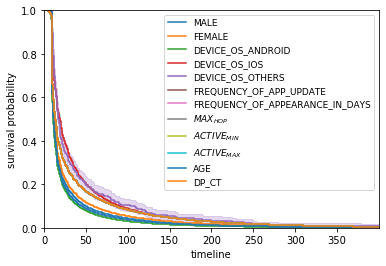

In [43]:
from lifelines.statistics import logrank_test
from matplotlib import pyplot as plt
ax = plt.subplot(111)
kmf = KaplanMeierFitter()
T = df["mean_hop"]
E = df["censored"]


Male = (df["gender"] == "Male")
Female =(df["gender"] == "Female")

android = (df["DeviceOS_value"].isin(["Android","android"]))
ios =(df["DeviceOS_value"].isin(['iOS', 'ios']))
other = (df["DeviceOS_value"].isin(['BlackBerry OS', 'Linux', 'Mac OS X', 'MeeGo', 'Other',
       'Symbian OS', 'Ubuntu','Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Phone', 'Windows RT',
       'Windows Vista', 'Windows XP']))


frequency_app_update = (df["frequency_app_update"] >= 0)
frequency_of_appearence_in_days = (df["frequency_of_appearence_in_days"] >= 0)
max_hop = (df["max_hop"] >= 0)
min_val = (df["min_val"] >= 0)
max_val = (df["max_val"] >= 0)
age = (df["age"] >= 0)
dp_ct = (df["dp_ct"] >= 0)


kmf.fit(T[Male], event_observed=E[Male], label="MALE")
kmf.plot(ax=ax)
kmf.fit(T[Female], event_observed=E[Female], label="FEMALE")
kmf.plot(ax=ax)

kmf.fit(T[android], event_observed=E[android], label="DEVICE_OS_ANDROID")
kmf.plot(ax=ax)
kmf.fit(T[ios], event_observed=E[ios], label="DEVICE_OS_IOS")
kmf.plot(ax=ax)
kmf.fit(T[other], event_observed=E[other], label="DEVICE_OS_OTHERS")
kmf.plot(ax=ax)

kmf.fit(T[frequency_app_update], event_observed=E[frequency_app_update], label="FREQUENCY_OF_APP_UPDATE")
kmf.plot(ax=ax)
kmf.fit(T[frequency_of_appearence_in_days], event_observed=E[frequency_of_appearence_in_days], label="FREQUENCY_OF_APPEARANCE_IN_DAYS")
kmf.plot(ax=ax)
kmf.fit(T[max_hop], event_observed=E[max_hop], label="$MAX_{HOP}$")
kmf.plot(ax=ax)
kmf.fit(T[min_val], event_observed=E[min_val], label="$ACTIVE_{MIN}$")
kmf.plot(ax=ax)
kmf.fit(T[max_val], event_observed=E[max_val], label="$ACTIVE_{MAX}$")
kmf.plot(ax=ax)
kmf.fit(T[age], event_observed=E[age], label="AGE")
kmf.plot(ax=ax)
kmf.fit(T[dp_ct], event_observed=E[dp_ct], label="DP_CT")
kmf.plot(ax=ax)

plt.legend(prop={'size': 9})

plt.ylim(0, 1);
plt.xlim(0,400)
plt.xticks(range(0,400,50))
plt.ylabel("survival probability")
plt.xlabel("timeline")
plt.savefig("./impact_of_all_parameters")





In [71]:
# df1 = df.sample(frac = 0.4)
df_test = df[df["min_val"]<=400]
df_test = df_test[df_test["min_val"] >= 200]
df_test = df_test[df_test["max_val"] >= 400]


In [72]:
df_test.count()

DeviceOS_value                     1463378
IAB                                1461005
age                                1463378
dp_ct                              1463378
frequency_app_update               1463378
frequency_of_appearence_in_days    1463378
gender                             1463378
id                                 1463378
life                               1463378
max_hop                            1463378
max_val                            1463378
mean_hop                           1463378
min_val                            1463378
mean_val_column                    1463378
censored                           1463378
dtype: int64

In [32]:
df1 = df.sample(frac = 0.4)

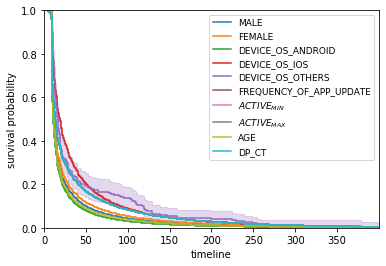

In [44]:
from lifelines.statistics import logrank_test
from matplotlib import pyplot as plt
ax = plt.subplot(111)
kmf = KaplanMeierFitter()
T = df1["mean_hop"]
E = df1["censored"]


Male = (df1["gender"] == "Male")
Female =(df["gender"] == "Female")

android = (df1["DeviceOS_value"].isin(["Android","android"]))
ios =(df1["DeviceOS_value"].isin(['iOS', 'ios']))
other = (df1["DeviceOS_value"].isin(['BlackBerry OS', 'Linux', 'Mac OS X', 'MeeGo', 'Other',
       'Symbian OS', 'Ubuntu','Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Phone', 'Windows RT',
       'Windows Vista', 'Windows XP']))


frequency_app_update = (df1["frequency_app_update"] >= 0)
# frequency_of_appearence_in_days = (df1["frequency_of_appearence_in_days"] >= 0)
# max_hop = (df1["max_hop"] >= 0)
min_val = (df1["min_val"] >= 0)
max_val = (df1["max_val"] >= 0)
age = (df1["age"] >= 0)
dp_ct = (df1["dp_ct"] >= 0)


kmf.fit(T[Male], event_observed=E[Male], label="MALE")
kmf.plot(ax=ax)
kmf.fit(T[Female], event_observed=E[Female], label="FEMALE")
kmf.plot(ax=ax)

kmf.fit(T[android], event_observed=E[android], label="DEVICE_OS_ANDROID")
kmf.plot(ax=ax)
kmf.fit(T[ios], event_observed=E[ios], label="DEVICE_OS_IOS")
kmf.plot(ax=ax)
kmf.fit(T[other], event_observed=E[other], label="DEVICE_OS_OTHERS")
kmf.plot(ax=ax)

kmf.fit(T[frequency_app_update], event_observed=E[frequency_app_update], label="FREQUENCY_OF_APP_UPDATE")
kmf.plot(ax=ax)
# kmf.fit(T[frequency_of_appearence_in_days], event_observed=E[frequency_of_appearence_in_days], label="FREQUENCY_OF_APPEARANCE_IN_DAYS")
# kmf.plot(ax=ax)
# kmf.fit(T[max_hop], event_observed=E[max_hop], label="MAX_HOP")
# kmf.plot(ax=ax)
kmf.fit(T[min_val], event_observed=E[min_val], label="$ACTIVE_{MIN}$")
kmf.plot(ax=ax)
kmf.fit(T[max_val], event_observed=E[max_val], label="$ACTIVE_{MAX}$")
kmf.plot(ax=ax)
kmf.fit(T[age], event_observed=E[age], label="AGE")
kmf.plot(ax=ax)
kmf.fit(T[dp_ct], event_observed=E[dp_ct], label="DP_CT")
kmf.plot(ax=ax)

plt.legend(prop={'size': 9})

plt.ylim(0, 1);
plt.xlim(0,400)
plt.xticks(range(0,400,50))
plt.ylabel("survival probability")
plt.xlabel("timeline")
plt.savefig("./selected_param")


In [5]:
df

,DeviceOS_value,IAB,age,dp_ct,frequency_app_update,frequency_of_appearence_in_days,gender,id,life,max_hop,max_val,mean_hop,min_val,mean_val_column,censored
0,android,{},-1,3,0,7,Unknown,000174f2-5996-4c0f-9e88-ac6dd089c214,459,160,491,76,32,65,1
1,android,{},-1,1,0,34,Unknown,0002ef1a-ae5b-4144-ba6e-8aeddb9e3426,498,50,640,15,142,14,1
2,android,NaN,-1,1,0,7,Unknown,000343f5-26d7-49d1-a3b8-25fe84f04105,330,280,332,47,2,47,1
3,Android,"{'IAB19': 213, 'IAB22': 213, 'IAB3': 213, 'IAB...",-1,4,0,37,Male,0003d0d5-beaa-4876-b382-adfd43ea45a2,458,39,640,12,182,12,1
4,android,"{'IAB12': 213, 'IAB22': 213, 'IAB3': 213}",50,2,0,6,Unknown,00077668-d459-4de6-b0e1-e57d2e8e4443,90,30,112,18,22,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927378,android,{},18,3,1,7,Unknown,fff8fdf1-a0c2-4ad3-af3f-9d00f05540b0,60,10,92,10,32,8,1
9927379,android,"{'IAB1': 213, 'IAB10': 213, 'IAB14': 213, 'IAB...",25,3,11,46,Unknown,fff94b0e-f58b-4a22-a01c-cb010586aecf,579,70,581,12,2,12,1
9927380,Android,{},-1,3,0,11,Unknown,fffce6dd-689d-4207-97ed-0580ff64af9f,449,120,451,40,2,40,1
9927381,android,"{'IAB301': 624, 'IAB308_3': 624, 'IAB318_8': 6...",18,5,1,9,Male,fffe21de-a405-46a0-ab64-6953d57f74c3,329,259,481,41,152,36,1


# Taking variation between different genders

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
       37767.28 <0.005       inf


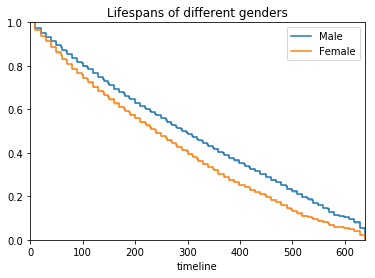

In [42]:
from lifelines.statistics import logrank_test

from matplotlib import pyplot as plt
ax = plt.subplot(111)
T = df["life"]
E = df["censored"]

M = (df["gender"] == "Male")
F =(df["gender"] == "Female")



kmf.fit(T[M], event_observed=E[M], label="Male")
kmf.plot(ax=ax)
kmf.fit(T[F], event_observed=E[F], label="Female")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different genders");
# df1['diff'] = df1['at_risk'] - df1['at_risk'].shift(-1)

results = logrank_test(T[M], T[F], E[M], E[F], alpha=.99)

results.print_summary()
    


In [43]:
kmf = KaplanMeierFitter()
kmf.fit(T[F], event_observed=E[F])
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[M], event_observed=E[M])
print(kmf.median_)


240.0
298.0


We can see the probability of survival for Males is more than Females. the median survival time for males is 298.0 and for females is 240.0 days. 


# Taking variation between different DeviceOS_value

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
      292679.04 <0.005       inf
None
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic    p  -log2(p)
           2.34 0.13      2.99
None
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic    p  -log2(p)
           4.07 0.04      4.52
None
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
       14765.28 <0.005       inf
None


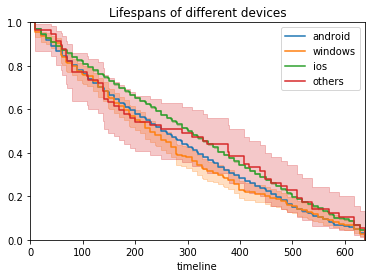

In [8]:
from lifelines.statistics import logrank_test


from matplotlib import pyplot as plt
kmf = KaplanMeierFitter()
ax = plt.subplot(111)
T = df["life"]
E = df["censored"]

android = (df["DeviceOS_value"].isin(["Android","android"]))

win =(df["DeviceOS_value"].isin(['Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Phone', 'Windows RT',
       'Windows Vista', 'Windows XP']))

ios =(df["DeviceOS_value"].isin(['iOS', 'ios']))

other = (df["DeviceOS_value"].isin(['BlackBerry OS', 'Linux', 'Mac OS X', 'MeeGo', 'Other',
       'Symbian OS', 'Ubuntu']))

kmf.fit(T[android], event_observed=E[android], label="android")
kmf.plot(ax=ax)
kmf.fit(T[win], event_observed=E[win], label="windows")
kmf.plot(ax=ax)
kmf.fit(T[ios], event_observed=E[ios], label="ios")
kmf.plot(ax=ax)
kmf.fit(T[other], event_observed=E[other], label="others")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different devices");
# df1['diff'] = df1['at_risk'] - df1['at_risk'].shift(-1)

results1 = logrank_test(T[android], T[~android] , E[android],E[~android] ,  alpha=.99)

results2 = logrank_test(T[win], T[~win] , E[win],E[~win] ,  alpha=.99)

results3 = logrank_test(T[other], T[~other] , E[other],E[~other] ,  alpha=.99)

results4 = logrank_test(T[ios], T[~ios] , E[ios],E[~ios] ,  alpha=.99)

print(results1.print_summary())
print(results2.print_summary())
print(results3.print_summary())
print(results4.print_summary())

In [50]:
kmf = KaplanMeierFitter()
kmf.fit(T[android], event_observed=E[android])
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[win], event_observed=E[win])
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[ios], event_observed=E[ios])
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[other], event_observed=E[other])
print(kmf.median_)

259.0
229.0
300.0
289.0


In [57]:

kmf = KaplanMeierFitter()
kmf.fit(T[android], event_observed=E[android])
print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[win], event_observed=E[win])
print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[ios], event_observed=E[ios])
print(kmf.survival_function_[:350])
kmf = KaplanMeierFitter()
kmf.fit(T[other], event_observed=E[other])
print(kmf.survival_function_[:360])

          KM_estimate
timeline             
0.0          1.000000
9.0          0.999747
10.0         0.970708
19.0         0.970040
20.0         0.943092
29.0         0.942191
30.0         0.917737
39.0         0.916436
40.0         0.893541
49.0         0.891857
50.0         0.870034
59.0         0.867149
60.0         0.846469
69.0         0.844340
70.0         0.824546
79.0         0.822258
80.0         0.802983
89.0         0.800765
90.0         0.782294
99.0         0.779762
100.0        0.761878
109.0        0.759256
110.0        0.741626
119.0        0.738720
120.0        0.722271
129.0        0.719297
130.0        0.703258
139.0        0.699848
140.0        0.684716
149.0        0.681003
...               ...
468.0        0.208953
469.0        0.198385
478.0        0.196952
479.0        0.182629
488.0        0.181131
489.0        0.165467
498.0        0.164000
499.0        0.151238
508.0        0.149622
509.0        0.140790
518.0        0.139080
519.0        0.130211
528.0     

We compared probability of survival of 4 different device groups . We can see that the probability of survival of IOS users is high in beginning but after 338 days id's having other deviceOS ex. mac,ubuntu, linux, sybianOS, MeeGo have higher probability of survival as compared to android, ios.

prob of survival for windows users is least.

The median survival time for android users is 259 days , for windows users is 229 , for IOS users is 300 days , for users including ubuntu , linux , mac , sybianOS is 289 days

There are a number of statistical tests available to formally test whether or not survival is better in one group compared with another, one of which is the log‐rank test...

for the android users, the log‐rank test yields a P‐value of <0.005, which indicates that there is huge difference in overall survival of android users on standard versus non android users.

for the windows users, the log‐rank test yields a P‐value of 0.13, which indicates that there is no evidence of a difference in overall survival of windows users on standard versus non windows users.

for the ios users, the log‐rank test yields a P‐value of <0.005, which indicates that there is huge difference in overall survival of ios users on standard versus non ios users.

for the other users, the log‐rank test yields a P‐value of <0.04, which indicates that there is  difference in overall survival of other users on standard versus android , windows , ios users.




# Survival function

In [87]:
# kmf.event_table
kmf.event_table.describe()

,removed,observed,censored,entrance,at_risk
count,132.000000,132.000000,132.0,1.320000e+02,1.320000e+02
mean,75207.446970,75207.446970,0.0,7.520745e+04,4.037208e+06
std,71523.126835,71523.126835,0.0,8.640678e+05,2.564154e+06
min,0.000000,0.000000,0.0,0.000000e+00,2.305020e+05
25%,19672.250000,19672.250000,0.0,0.000000e+00,1.957866e+06
50%,66668.000000,66668.000000,0.0,0.000000e+00,3.634891e+06
75%,90730.000000,90730.000000,0.0,0.000000e+00,5.764120e+06
max,498630.000000,498630.000000,0.0,9.927383e+06,9.927383e+06


    1. LIFE as parameter : (max_val - min_val)

		Observations
		data censored_or_not   study_period_of_id	start time	end time  prob of survival prob of survival	prob 																								              of survival
																				0.25            0.75		0.50	       
	
                No              9 to 628 days		628th day	9th day		after 79 days		after 210  after 388 																									days		days 
                
                
 no. of id's that die on average on a single day 75207. .

Text(0.5, 1.0, 'Survival function')

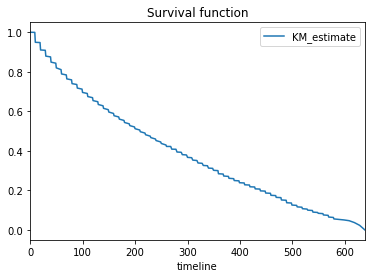

In [85]:
from matplotlib import pyplot as plt

kmf = KaplanMeierFitter()
kmf.fit(df["life"] , df["censored"])
kmf.survival_function_.plot()
plt.title('Survival function')

In [55]:
at10 = df[df["life"] == 10] # most id's died
devices= ['Android', 'BlackBerry OS', 'Linux', 'Mac OS X', 'MeeGo', 'Other',
       'Symbian OS', 'Ubuntu', 'Unknown', 'Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Phone', 'Windows RT',
       'Windows Vista', 'Windows XP', 'android', 'iOS', 'ios']
for i in devices:
    print(i+": " , at10[at10["DeviceOS_value"]==i]["DeviceOS_value"].count() * 100/at10["DeviceOS_value"].count())

Android:  8.166576419389127
BlackBerry OS:  0.0
Linux:  0.0
Mac OS X:  0.0
MeeGo:  0.0
Other:  0.0004010990112909372
Symbian OS:  0.0
Ubuntu:  0.0
Unknown:  65.74293564366364
Windows 10:  0.001002747528227343
Windows 7:  0.0018049455508092173
Windows 8:  0.0
Windows 8.1:  0.0004010990112909372
Windows Phone:  0.0002005495056454686
Windows RT:  0.0
Windows Vista:  0.0
Windows XP:  0.0002005495056454686
android:  25.04803160660209
iOS:  0.4335880312055031
ios:  0.6048573090267333


In [88]:
for i in [0.9,0.93,0.95,0.97,0.98,0.99,1]:
    print(kmf.event_table.quantile(q=i ,axis=0, numeric_only=True))

removed      146140.2
observed     146140.2
censored          0.0
entrance          0.0
at_risk     7827977.9
Name: 0.9, dtype: float64
removed      177102.52
observed     177102.52
censored          0.00
entrance          0.00
at_risk     8416487.80
Name: 0.93, dtype: float64
removed      207056.65
observed     207056.65
censored          0.00
entrance          0.00
at_risk     8860109.60
Name: 0.95, dtype: float64
removed      237314.76
observed     237314.76
censored          0.00
entrance          0.00
at_risk     9410656.86
Name: 0.97, dtype: float64
removed      275030.96
observed     275030.96
censored          0.00
entrance          0.00
at_risk     9611666.40
Name: 0.98, dtype: float64
removed      347971.30
observed     347971.30
censored          0.00
entrance          0.00
at_risk     9925347.54
Name: 0.99, dtype: float64
removed      498630.0
observed     498630.0
censored          0.0
entrance    9927383.0
at_risk     9927383.0
Name: 1, dtype: float64


In [27]:
kmf.median_survival_time_

210.0

The median survival time for whole population is 210 days

In [86]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,9927383,9927383
9.0,6566,6566,0,0,9927383
10.0,498630,498630,0,0,9920817
19.0,12398,12398,0,0,9422187
20.0,372638,372638,0,0,9409789
29.0,15854,15854,0,0,9037151
30.0,293068,293068,0,0,9021297
39.0,39000,39000,0,0,8728229
40.0,263976,263976,0,0,8689229


At 10th day event occured for 498630 id's . In which 77.8 % id's have unkown gender which seeems to ve anomalous , Also among the device OS values 65.74 % are unknown users which is quite significant value.

# Keplan meier analysis taking MEAN_VAL as a parameter

# Survival function

Text(0.5, 1.0, 'Survival function')

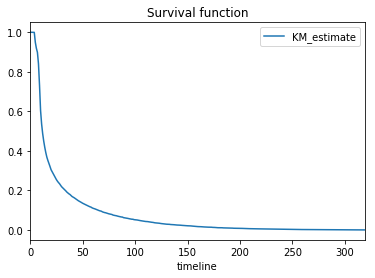

In [89]:
kmf = KaplanMeierFitter()
kmf.fit(df["mean_val_column"] , df["censored"])
from matplotlib import pyplot as plt
kmf.survival_function_.plot()
plt.title('Survival function')


data censored_or_not/study_period_of_id/start time/end time	/prob of survival/prob of survival/prob of survival	
																0.75				0.50			0.25	
		
	No				9 to 628 days	628th day	9th day		after 9 days	   after 12 days	  after 25days
    
no. of id's that die on average on a single day 49886.

In [90]:
kmf.event_table.describe()

,removed,observed,censored,entrance,at_risk
count,1.990000e+02,1.990000e+02,199.0,1.990000e+02,1.990000e+02
mean,4.988635e+04,4.988635e+04,0.0,4.988635e+04,1.200112e+06
std,1.470101e+05,1.470101e+05,0.0,7.037335e+05,1.939725e+06
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.042000e+03
25%,4.014000e+03,4.014000e+03,0.0,0.000000e+00,1.677315e+05
50%,9.268000e+03,9.268000e+03,0.0,0.000000e+00,5.043560e+05
75%,2.811650e+04,2.811650e+04,0.0,0.000000e+00,1.305820e+06
max,1.269919e+06,1.269919e+06,0.0,9.927383e+06,9.927383e+06


In [91]:
kmf.event_table


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,9927383,9927383
4.0,6566,6566,0,0,9927383
5.0,498630,498630,0,0,9920817
6.0,299858,299858,0,0,9422187
7.0,205442,205442,0,0,9122329
8.0,570361,570361,0,0,8916887
9.0,1082630,1082630,0,0,8346526
10.0,1269919,1269919,0,0,7263896
11.0,677052,677052,0,0,5993977


At 10th day event occured for 1269919  id's . In which 77.8 % id's have unkown gender which seeems to ve anomalous , Also among the device OS values 65.74 % are unknown users which is quite significant value. upto 99th percentile 685163 id's are dead but the hazard  rate doubled for 1.8 times i.e. at 10th day .

In [92]:
for i in [0.9,0.93,0.95,0.97,0.98,0.99,1]:
    print(kmf.event_table.quantile(q=i ,axis=0, numeric_only=True))

removed       91718.8
observed      91718.8
censored          0.0
entrance          0.0
at_risk     2842857.0
Name: 0.9, dtype: float64
removed      158040.94
observed     158040.94
censored          0.00
entrance          0.00
at_risk     3682714.38
Name: 0.93, dtype: float64
removed      231177.9
observed     231177.9
censored          0.0
entrance          0.0
at_risk     4884721.6
Name: 0.95, dtype: float64
removed      382367.30
observed     382367.30
censored          0.00
entrance          0.00
at_risk     8380747.66
Name: 0.97, dtype: float64
removed      501499.24
observed     501499.24
censored          0.00
entrance          0.00
at_risk     9134323.32
Name: 0.98, dtype: float64
removed      685163.56
observed     685163.56
censored          0.00
entrance          0.00
at_risk     9920948.32
Name: 0.99, dtype: float64
removed     1269919.0
observed    1269919.0
censored          0.0
entrance    9927383.0
at_risk     9927383.0
Name: 1, dtype: float64


In [94]:
kmf.median_survival_time_


12.0

median survival time is 12 days for an id

# Taking variation between different genders


<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
       14490.39 <0.005       inf


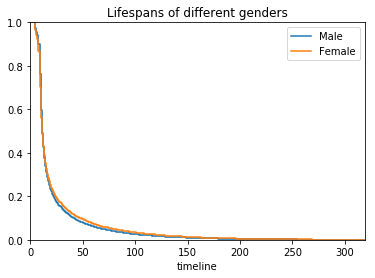

In [101]:
from lifelines.statistics import logrank_test

from matplotlib import pyplot as plt
ax = plt.subplot(111)
T = df["mean_val_column"]
E = df["censored"]

M = (df["gender"] == "Male")
F =(df["gender"] == "Female")





kmf.fit(T[M], event_observed=E[M], label="Male")
kmf.plot(ax=ax)
kmf.fit(T[F], event_observed=E[F], label="Female")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different genders");
# df1['diff'] = df1['at_risk'] - df1['at_risk'].shift(-1)

results = logrank_test(T[F], T[~F], E[F], E[~F], alpha=.99)

results.print_summary()
    


We can't see a clear difference between survival probability for 2 groups i.e. male and female taking mean_val as duration parameter. At around 18-22 days the probability of survival for female id's have increased by 7.3%

In [103]:
kmf = KaplanMeierFitter()
kmf.fit(T[F], event_observed=E[F])
print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[M], event_observed=E[M])
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
4.0          0.999538
5.0          0.964426
6.0          0.941241
7.0          0.924512
8.0          0.866509
9.0          0.704511
10.0         0.561567
11.0         0.484306
12.0         0.430857
13.0         0.389499
14.0         0.352714
15.0         0.326833
16.0         0.303159
17.0         0.285604
18.0         0.271346
19.0         0.253375
20.0         0.240195
21.0         0.230316
22.0         0.220241
23.0         0.210932
24.0         0.202122
25.0         0.193883
26.0         0.186747
27.0         0.180185
28.0         0.174857
29.0         0.167762
30.0         0.161715
31.0         0.156863
32.0         0.152339
...               ...
194.0        0.005994
196.0        0.005892
199.0        0.005540
202.0        0.005368
204.0        0.005136
206.0        0.004836
209.0        0.004318
212.0        0.004090
214.0        0.003843
219.0        0.003615
224.0        0.003317
229.0        0.003050
234.0     

In [105]:
kmf = KaplanMeierFitter()
kmf.fit(T[F], event_observed=E[F])
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[M], event_observed=E[M])
print(kmf.median_)

# the median survival time for females and males is same 

11.0
11.0


experiment 4. here we plot a distribution showing variation in survival probability for  different gender types of an  id  , we can see a clear exponential decay here 
	
	observations										
											Female					Male			
	a. 	probability of survival for users is 0.75 after		between 8-9 days		after 9 days			
	b. 	probability of survival for users is 0.50 after		between 10-11 days	after 11 days		
	c. 	probability of survival for users is 0.25 after		after 19 days			after 18 days	
    
discussion (cause of results)		

	hence we can see very fast  exponential decay  for female users and also similar decay for Male users. Probability of survival for female users is SAME at a time T as compared to probability of 	survival of male users  at same time T.

	both male and female users follow exactly same distribution curve for the probability of survival hence we cannot decide which type of users have better survival probability.

# Taking variation between different DeviceOS_value

In [ ]:
from lifelines.statistics import logrank_test


from matplotlib import pyplot as plt
kmf = KaplanMeierFitter()
ax = plt.subplot(111)
T = df["max_hop"]
E = df["censored"]

android = (df["DeviceOS_value"].isin(["Android","android"]))

win =(df["DeviceOS_value"].isin(['Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Phone', 'Windows RT',
       'Windows Vista', 'Windows XP']))

ios =(df["DeviceOS_value"].isin(['iOS', 'ios']))

other = (df["DeviceOS_value"].isin(['BlackBerry OS', 'Linux', 'Mac OS X', 'MeeGo', 'Other',
       'Symbian OS', 'Ubuntu']))

kmf.fit(T[android], event_observed=E[android], label="android")
kmf.plot(ax=ax)
kmf.fit(T[win], event_observed=E[win], label="windows")
kmf.plot(ax=ax)
kmf.fit(T[ios], event_observed=E[ios], label="ios")
kmf.plot(ax=ax)
kmf.fit(T[other], event_observed=E[other], label="others")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different device id's");

results1 = logrank_test(T[android], T[~android] , E[android],E[~android] ,  alpha=.99)

results2 = logrank_test(T[win], T[~win] , E[win],E[~win] ,  alpha=.99)

results3 = logrank_test(T[other], T[~other] , E[other],E[~other] ,  alpha=.99)

results4 = logrank_test(T[ios], T[~ios] , E[ios],E[~ios] ,  alpha=.99)

print(results1.print_summary())
print(results2.print_summary())
print(results3.print_summary())
print(results4.print_summary())


In [9]:
kmf = KaplanMeierFitter()
kmf.fit(T[android], event_observed=E[android])
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[win], event_observed=E[win])
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[ios], event_observed=E[ios])
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[other], event_observed=E[other])
print(kmf.median_)

30.0
49.0
60.0
70.0


In [18]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,57,57
10.0,4,4,0,0,57
20.0,1,1,0,0,53
30.0,1,1,0,0,52
39.0,13,13,0,0,51
49.0,2,2,0,0,38
50.0,2,2,0,0,36
59.0,2,2,0,0,34
60.0,2,2,0,0,32


In [37]:

# kmf = KaplanMeierFitter()
# kmf.fit(T[android], event_observed=E[android])
# print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[win], event_observed=E[win])
print(kmf.survival_function_[:190])
kmf = KaplanMeierFitter()
kmf.fit(T[ios], event_observed=E[ios])
print(kmf.survival_function_[:190])
# kmf = KaplanMeierFitter()
# kmf.fit(T[other], event_observed=E[other])
# print(kmf.survival_function_[:360])

          KM_estimate
timeline             
0.0          1.000000
10.0         0.928571
20.0         0.916667
30.0         0.909524
39.0         0.545238
40.0         0.507143
49.0         0.454762
50.0         0.430952
59.0         0.421429
60.0         0.400000
69.0         0.388095
70.0         0.376190
79.0         0.366667
80.0         0.350000
89.0         0.345238
90.0         0.326190
99.0         0.319048
100.0        0.316667
109.0        0.314286
110.0        0.304762
119.0        0.295238
120.0        0.273810
129.0        0.264286
130.0        0.257143
139.0        0.254762
140.0        0.245238
149.0        0.238095
150.0        0.233333
159.0        0.228571
160.0        0.221429
169.0        0.216667
170.0        0.214286
179.0        0.204762
180.0        0.195238
189.0        0.190476
190.0        0.188095
          KM_estimate
timeline             
0.0          1.000000
9.0          0.999661
10.0         0.887949
19.0         0.873766
20.0         0.791447
29.0      

 

prob of survival for android users is least. 75% of android users died in just 16 days. on 10th day 968329 android users died which is maximum for any other device users while for windows these are 40 users , for ios it is 19171 users which seems anomalous to us

The median survival time for android users is 11 days , for windows users is 14 , for IOS users is 17 days , for users including ubuntu , linux , mac , sybianOS is 23 days

There are a number of statistical tests available to formally test whether or not survival is better in one group compared with another, one of which is the log‐rank test...

for the android users, the log‐rank test yields a P‐value of <0.005, which indicates that there is huge difference in overall survival of android users on standard versus non android users.

for the windows users, the log‐rank test yields a P‐value of <0.005, , which indicates that there is huge difference in overall survival ofwindows users on standard versus non windows users.

for the ios users, the log‐rank test yields a P‐value of <0.005, which indicates that there is huge difference in overall survival of ios users on standard versus non ios users.


observations	
												android 				windows					iOS
	a. 	probability of survival for users is 0.75 after		between 8-9 days		between 10-11 days	after 10 days	
	b. 	probability of survival for users is 0.50 after		between 10-11 days	between 13-14 days	after 16 days
	c. 	probability of survival for users is 0.25 after		after 16 days			after 28-29 days		after 13 days

discussion (cause of results)

hence we can see very fast  exponential decay  for android users as compared to iOS or windows users. Probability of survival for android users is LESS  at a time T as compared to probability of 	survival of windows or iOS users  at same time T.
	
NOTE….for first  5-6 days of study events are occurring at same rate to android and iOS, windows users but suddenly 25% of android users died in 8-9 days  . We might show our add campaigns 	to targeted iOS or windows users based on our analysis.




In [69]:

# df_ios = df[df["DeviceOS_value"].isin(['iOS', 'ios'])]

# kmf.fit(df_ios["mean_val_column"], event_observed=df_ios["censored"], label="windows")
# kmf.event_table["removed"].max()

win =(df["DeviceOS_value"].isin(['Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Phone', 'Windows RT',
       'Windows Vista', 'Windows XP']))
ios =(df["DeviceOS_value"].isin(['iOS', 'ios']))

ios1 = df[ios]
win1 = df[win]

ios2 = ios1[ios1["max_hop"]<=119]
win2 = win1[win1["max_hop"]>=119]
ios2[ios2["age"]!=-1].mean()#24.904622
# win2[win2["age"]!=-1].mean()#29.168
# 28.460938

age                                 24.904622
dp_ct                                2.815329
frequency_app_update                 5.168496
frequency_of_appearence_in_days     17.642109
life                               259.176945
max_hop                             53.852458
max_val                            373.967985
mean_hop                            22.932190
min_val                            114.791040
mean_val_column                     18.331017
censored                             1.000000
dtype: float64

# taking censorship into account life as param

we plot a percentile distribution  plot for mean life  of an id and observed that it gives us a massive change at 98th percentile and  and previously we are not taking right censorship in our analysis
	Here we are noting that there are 1 percent of id’s which are having their mean life >=319 i.e. these id’s are not observed in a long period of time from their first seen so we restrict our study area 
	to the id’s which are entering into our study period and having their event in 165-170 days . By this we are loosing 2 percent of our id’s due to censorship.
		 
		[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99]
		[8.0, 9.0, 10.0, 11.0, 14.0, 17.0, 25.0, 42.0, 79.0, 143.0, 143.0, 165.0, 165.0, 319.0]


In [47]:
df["censored"]=1

In [48]:
df.loc[df["life"] >= 169,"censored"] = 0
df

,DeviceOS_value,IAB,age,dp_ct,frequency_app_update,frequency_of_appearence_in_days,gender,id,life,max_hop,max_val,mean_hop,min_val,mean_val_column,censored
0,android,{},-1,3,0,7,Unknown,000174f2-5996-4c0f-9e88-ac6dd089c214,459,160,491,76,32,65,0
1,android,{},-1,1,0,34,Unknown,0002ef1a-ae5b-4144-ba6e-8aeddb9e3426,498,50,640,15,142,14,0
2,android,NaN,-1,1,0,7,Unknown,000343f5-26d7-49d1-a3b8-25fe84f04105,330,280,332,47,2,47,0
3,Android,"{'IAB19': 213, 'IAB22': 213, 'IAB3': 213, 'IAB...",-1,4,0,37,Male,0003d0d5-beaa-4876-b382-adfd43ea45a2,458,39,640,12,182,12,0
4,android,"{'IAB12': 213, 'IAB22': 213, 'IAB3': 213}",50,2,0,6,Unknown,00077668-d459-4de6-b0e1-e57d2e8e4443,90,30,112,18,22,15,1
5,Unknown,"{'IAB17_44': 213, 'IAB22': 213, 'IAB3_4': 213}",-1,2,0,2,Unknown,0007c748-b408-474e-8444-cafcb5f5eb53,389,389,561,389,172,194,0
6,android,"{'IAB12': 213, 'IAB19': 213, 'IAB1_7': 213, 'I...",21,5,6,23,Male,000853b8-16f5-41ab-9c2e-e6a85c84289a,220,10,222,9,2,9,0
7,Unknown,{'IAB22': 213},25,3,0,10,Male,00095ed6-6337-4070-8541-e856b6e2a8a1,439,269,581,48,142,43,0
8,Android,"{'IAB19': 213, 'IAB9': 213, 'IAB9_7': 213}",-1,4,0,18,Male,000aab14-5cb2-4eec-a2b7-553afd39e7c6,628,340,630,34,2,34,0
9,android,{'IAB22': 213},25,4,3,4,Male,000ab800-a390-4764-a7df-409529fa7999,30,10,162,10,132,7,1


In [49]:
df[df["censored"]==0].count()

DeviceOS_value                     5735602
IAB                                5623804
age                                5735602
dp_ct                              5735602
frequency_app_update               5735602
frequency_of_appearence_in_days    5735602
gender                             5735602
id                                 5735602
life                               5735602
max_hop                            5735602
max_val                            5735602
mean_hop                           5735602
min_val                            5735602
mean_val_column                    5735602
censored                           5735602
dtype: int64

In [26]:
df

,DeviceOS_value,IAB,age,dp_ct,frequency_app_update,frequency_of_appearence_in_days,gender,id,life,max_hop,max_val,mean_hop,min_val,mean_val_column,censored
0,android,{},-1,3,0,7,Unknown,000174f2-5996-4c0f-9e88-ac6dd089c214,459,160,491,76,32,65,1
1,android,{},-1,1,0,34,Unknown,0002ef1a-ae5b-4144-ba6e-8aeddb9e3426,498,50,640,15,142,14,1
2,android,NaN,-1,1,0,7,Unknown,000343f5-26d7-49d1-a3b8-25fe84f04105,330,280,332,47,2,47,1
3,Android,"{'IAB19': 213, 'IAB22': 213, 'IAB3': 213, 'IAB...",-1,4,0,37,Male,0003d0d5-beaa-4876-b382-adfd43ea45a2,458,39,640,12,182,12,1
4,android,"{'IAB12': 213, 'IAB22': 213, 'IAB3': 213}",50,2,0,6,Unknown,00077668-d459-4de6-b0e1-e57d2e8e4443,90,30,112,18,22,15,1
5,Unknown,"{'IAB17_44': 213, 'IAB22': 213, 'IAB3_4': 213}",-1,2,0,2,Unknown,0007c748-b408-474e-8444-cafcb5f5eb53,389,389,561,389,172,194,0
6,android,"{'IAB12': 213, 'IAB19': 213, 'IAB1_7': 213, 'I...",21,5,6,23,Male,000853b8-16f5-41ab-9c2e-e6a85c84289a,220,10,222,9,2,9,1
7,Unknown,{'IAB22': 213},25,3,0,10,Male,00095ed6-6337-4070-8541-e856b6e2a8a1,439,269,581,48,142,43,1
8,Android,"{'IAB19': 213, 'IAB9': 213, 'IAB9_7': 213}",-1,4,0,18,Male,000aab14-5cb2-4eec-a2b7-553afd39e7c6,628,340,630,34,2,34,1
9,android,{'IAB22': 213},25,4,3,4,Male,000ab800-a390-4764-a7df-409529fa7999,30,10,162,10,132,7,1


In [50]:
kmf = KaplanMeierFitter()



Text(0.5, 1.0, 'Survival function')

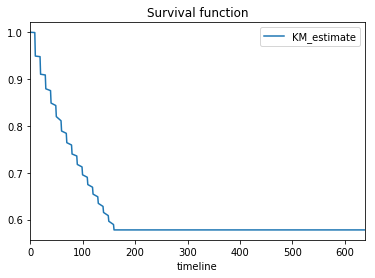

In [66]:
kmf.fit(df["life"] , event_observed = df["censored"])
from matplotlib import pyplot as plt
kmf.survival_function_.plot()
plt.title('Survival function')

data censored_or_not study_period_of_id	start time	end time prob of survival	prob of survival	prob of survival
                                                                   0.75			0.50				0.25

    yes					9 to 169 days			169th day	9th day		after 79 days			———			———
    
1.here we observed that probability of survival remains constant after 160 days with probability of 0.572499 and so the decay curve is not exponential it’s a straight line
		hence we find that taking LIFE as survival estimation parameter is not useful in our work 

	
2.We find out that the time at which 50% of id’s are dead comes out to be 82 days that means that average life of half of id’s are 82 days.

In [67]:
kmf.event_table.describe()

,removed,observed,censored,entrance,at_risk
count,132.000000,132.000000,132.000000,1.320000e+02,1.320000e+02
mean,75207.446970,31755.916667,43451.530303,7.520745e+04,4.037208e+06
std,71523.126835,78216.371619,42172.378895,8.640678e+05,2.564154e+06
min,0.000000,0.000000,0.000000,0.000000e+00,2.305020e+05
25%,19672.250000,0.000000,1372.500000,0.000000e+00,1.957866e+06
50%,66668.000000,0.000000,23921.000000,0.000000e+00,3.634891e+06
75%,90730.000000,0.000000,74669.750000,0.000000e+00,5.764120e+06
max,498630.000000,498630.000000,230502.000000,9.927383e+06,9.927383e+06


the above graph shows that the slope when interploated is constant for the survival function curve .....

# Taking variation between different genders


<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
        8602.61 <0.005       inf


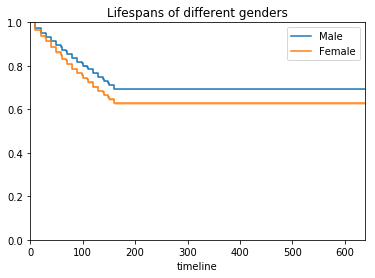

In [77]:
from lifelines.statistics import logrank_test

from matplotlib import pyplot as plt
ax = plt.subplot(111)
T = df["life"]
E = df["censored"]

M = (df["gender"] == "Male")
F =(df["gender"] == "Female")





kmf.fit(T[M], event_observed=E[M], label="Male")

kmf.plot(ax=ax)
kmf.fit(T[F], event_observed=E[F], label="Female")

kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different genders");
# df1['diff'] = df1['at_risk'] - df1['at_risk'].shift(-1)

results = logrank_test(T[F], T[~F], E[F], E[~F], alpha=.99)

results.print_summary()
    

In [78]:
T = df[df["life"] <= 165]["life"]
E = df["censored"]
kmf = KaplanMeierFitter()
kmf.fit(T[F], event_observed=None)
print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[M], event_observed=None)
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
9.0          0.998759
10.0         0.904489
19.0         0.901741
20.0         0.828059
29.0         0.824551
30.0         0.766638
39.0         0.755318
40.0         0.698404
49.0         0.682196
50.0         0.629674
59.0         0.597467
60.0         0.547930
69.0         0.533129
70.0         0.487462
79.0         0.472361
80.0         0.427674
89.0         0.414756
90.0         0.371951
99.0         0.355406
100.0        0.313665
109.0        0.298361
110.0        0.259333
119.0        0.243433
120.0        0.205628
129.0        0.190715
130.0        0.154454
139.0        0.136402
140.0        0.101817
149.0        0.083185
150.0        0.049863
159.0        0.031174
160.0        0.000000
          KM_estimate
timeline             
0.0          1.000000
9.0          0.999213
10.0         0.910621
19.0         0.909094
20.0         0.839872
29.0         0.837247
30.0         0.783824
39.0         0.775619
40.0      

the median survival time for femlales is 70 days and for males it is 80 days

observations										
                                                                Female					Male			
	a. 	probability of survival for users is 0.75 after		between 30 days		after 39-40 days			
	b. 	probability of survival for users is 0.50 after		between 69-70 days	     after 79 days		
	c. 	probability of survival for users is 0.25 after		after 110 days			after 119-120 days	
    
discussion (cause of results)	

    males have more survival probability in case of censoring than females..i.e on average event occured to male id's approximately 9-10 days than event occured to female id's

	

# Taking variation between different DeviceOS_value

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
      327084.77 <0.005       inf
None
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic    p  -log2(p)
           5.72 0.02      5.90
None
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic    p  -log2(p)
           0.54 0.46      1.11
None
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
       13145.38 <0.005       inf
None


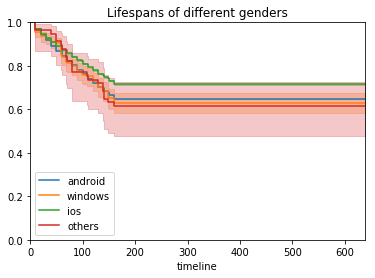

In [80]:
from lifelines.statistics import logrank_test


from matplotlib import pyplot as plt
kmf = KaplanMeierFitter()
ax = plt.subplot(111)
T = df["life"]
E = df["censored"]

android = (df["DeviceOS_value"].isin(["Android","android"]))

win =(df["DeviceOS_value"].isin(['Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Phone', 'Windows RT',
       'Windows Vista', 'Windows XP']))

ios =(df["DeviceOS_value"].isin(['iOS', 'ios']))

other = (df["DeviceOS_value"].isin(['BlackBerry OS', 'Linux', 'Mac OS X', 'MeeGo', 'Other',
       'Symbian OS', 'Ubuntu']))

kmf.fit(T[android], event_observed=E[android], label="android")
kmf.plot(ax=ax)
kmf.fit(T[win], event_observed=E[win], label="windows")
kmf.plot(ax=ax)
kmf.fit(T[ios], event_observed=E[ios], label="ios")
kmf.plot(ax=ax)
kmf.fit(T[other], event_observed=E[other], label="others")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different genders");
# df1['diff'] = df1['at_risk'] - df1['at_risk'].shift(-1)

results1 = logrank_test(T[android], T[~android] , E[android],E[~android] ,  alpha=.99)

results2 = logrank_test(T[win], T[~win] , E[win],E[~win] ,  alpha=.99)

results3 = logrank_test(T[other], T[~other] , E[other],E[~other] ,  alpha=.99)

results4 = logrank_test(T[ios], T[~ios] , E[ios],E[~ios] ,  alpha=.99)

print(results1.print_summary())
print(results2.print_summary())
print(results3.print_summary())
print(results4.print_summary())


In [82]:
T = df[df["life"] <= 165]["life"]
E = df["censored"]
kmf = KaplanMeierFitter()
kmf.fit(T[android], event_observed=None)
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[win], event_observed=None)
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[ios], event_observed=None)
print(kmf.median_)
kmf = KaplanMeierFitter()
kmf.fit(T[other], event_observed=None)
print(kmf.median_)

79.0
70.0
70.0
79.0


In [85]:
T = df[df["life"] <= 165]["life"]
E = df["censored"]
kmf = KaplanMeierFitter()
kmf.fit(T[android], event_observed=None)
print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[win], event_observed=None)
print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[ios], event_observed=None)
print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[other], event_observed=None)
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
9.0          0.999281
10.0         0.916713
19.0         0.914815
20.0         0.838192
29.0         0.835630
30.0         0.766101
39.0         0.762401
40.0         0.697304
49.0         0.692514
50.0         0.630464
59.0         0.622261
60.0         0.563462
69.0         0.557409
70.0         0.501127
79.0         0.494624
80.0         0.439819
89.0         0.433511
90.0         0.380992
99.0         0.373793
100.0        0.322942
109.0        0.315489
110.0        0.265359
119.0        0.257097
120.0        0.210328
129.0        0.201872
130.0        0.156269
139.0        0.146572
140.0        0.103546
149.0        0.092990
150.0        0.051692
159.0        0.039898
160.0        0.000000
          KM_estimate
timeline             
0.0          1.000000
10.0         0.883871
20.0         0.825806
30.0         0.806452
39.0         0.774194
40.0         0.761290
49.0         0.754839
50.0         0.741935
59.0      

We compared probability of survival of 4 different device groups . We can see that the probability of survival of  users IOS is high.

the survival probability for android and windows users follows same decay behaviour . 

the decay bahaviour of users having meegoOS , sybianOS , macOS , ubuntu , linux is not clear . their survival probability for first 40 days is around 0.86 which is on average 15.33% higher than all the other device users...than it come down nearly after 90-100 days which 4% lower than all the other device users

The median survival time for android users is 79 days , for windows users is 70 , for IOS users is 70 days , for users including ubuntu , linux , mac , sybianOS is 70 days

There are a number of statistical tests available to formally test whether or not survival is better in one group compared with another, one of which is the log‐rank test...

for the android users, the log‐rank test yields a P‐value of <0.005, which indicates that there is huge difference in overall survival of android users on standard versus non android users.

for the windows users, the log‐rank test yields a P‐value of 0.02, , which indicates that there is no difference in overall survival of windows users on standard versus non-windows users.

for the ios users, the log‐rank test yields a P‐value of <0.005, which indicates that there is huge difference in overall survival of ios users on standard versus non ios users.

for the other users, the log‐rank test yields a P‐value of 0.46, which indicates that there is no difference in overall survival of other users on standard versus android , windows , ios users.

observations	
                                                            android 				windows					iOS
	a. 	probability of survival for users is 0.75 after		between 30-39 days		between 49 days	   after 29 days	
	b. 	probability of survival for users is 0.50 after		between 70-71 days	between 69 days	     after 70 days
	c. 	probability of survival for users is 0.25 after		after 119 days			after 120 days	  after 119 days






# why this mean_val concept fail while giving better results than taking life as a duration parameter

discussion (cause of results)

1. The mean val concept fail because it means that on average how much time an id can take to appear by seeing it’s hop counts and frequency of appearence pattern but it doesn’t tell how much time or what time we can expect from the id to be seen after its last seen . As the mean val might be changed because its last seen is changed …..it may happen that the id with diff of max_val and min_val may be small but the frequency of appearance of id is more and hence the mean val is Lower and we expect this id to disappear after its lsat seen quickly just because its’s mean val of occurrence is small …..

But on the other hand it may also be possible that the id is so frequently appearing that it will appear again for short duration also …..so we reject our hypothesis

2. Also the id’s which have a long life but have frequency of appearance very small as they appear less times so their mean time is more and by our hypothesis we ay that the probability of survival for these id are more because their mean val is more…

But this may happen that it will appear after the study period or after very long time after their last seen this leads to probability of survival to become 0 and they will be counted in censored id’s and this leads to rejection of our hypothesis of taking mean as survival estimation duration parameter………

# taking max_hop as duration parameter

Text(0.5, 1.0, 'Survival function')

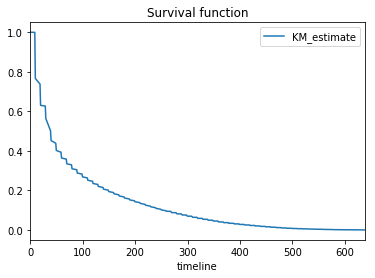

In [19]:

kmf = KaplanMeierFitter()
df["censored"]=1
kmf.fit(df["max_hop"] , df["censored"])
kmf.survival_function_

from matplotlib import pyplot as plt
kmf.survival_function_.plot()
plt.title('Survival function')


In [10]:
df

,DeviceOS_value,IAB,age,dp_ct,frequency_app_update,frequency_of_appearence_in_days,gender,id,life,max_hop,max_val,mean_hop,min_val,mean_val_column,censored
0,android,{},-1,3,0,7,Unknown,000174f2-5996-4c0f-9e88-ac6dd089c214,459,160,491,76,32,65,1
1,android,{},-1,1,0,34,Unknown,0002ef1a-ae5b-4144-ba6e-8aeddb9e3426,498,50,640,15,142,14,1
2,android,NaN,-1,1,0,7,Unknown,000343f5-26d7-49d1-a3b8-25fe84f04105,330,280,332,47,2,47,1
3,Android,"{'IAB19': 213, 'IAB22': 213, 'IAB3': 213, 'IAB...",-1,4,0,37,Male,0003d0d5-beaa-4876-b382-adfd43ea45a2,458,39,640,12,182,12,1
4,android,"{'IAB12': 213, 'IAB22': 213, 'IAB3': 213}",50,2,0,6,Unknown,00077668-d459-4de6-b0e1-e57d2e8e4443,90,30,112,18,22,15,1
5,Unknown,"{'IAB17_44': 213, 'IAB22': 213, 'IAB3_4': 213}",-1,2,0,2,Unknown,0007c748-b408-474e-8444-cafcb5f5eb53,389,389,561,389,172,194,1
6,android,"{'IAB12': 213, 'IAB19': 213, 'IAB1_7': 213, 'I...",21,5,6,23,Male,000853b8-16f5-41ab-9c2e-e6a85c84289a,220,10,222,9,2,9,1
7,Unknown,{'IAB22': 213},25,3,0,10,Male,00095ed6-6337-4070-8541-e856b6e2a8a1,439,269,581,48,142,43,1
8,Android,"{'IAB19': 213, 'IAB9': 213, 'IAB9_7': 213}",-1,4,0,18,Male,000aab14-5cb2-4eec-a2b7-553afd39e7c6,628,340,630,34,2,34,1
9,android,{'IAB22': 213},25,4,3,4,Male,000ab800-a390-4764-a7df-409529fa7999,30,10,162,10,132,7,1


# Taking variation between different genders


<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
        6102.55 <0.005       inf


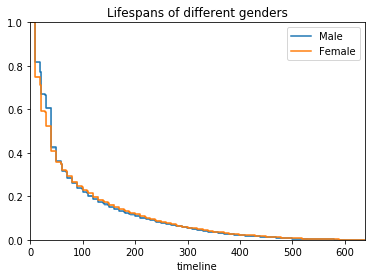

In [6]:
from lifelines.statistics import logrank_test

from matplotlib import pyplot as plt
ax = plt.subplot(111)
T = df["max_hop"]
E = df["censored"]

M = (df["gender"] == "Male")
F =(df["gender"] == "Female")


kmf.fit(T[M], event_observed=E[M], label="Male")
kmf.plot(ax=ax)
kmf.fit(T[F], event_observed=E[F], label="Female")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different genders");
# df1['diff'] = df1['at_risk'] - df1['at_risk'].shift(-1)

results = logrank_test(T[F], T[~F], E[F], E[~F], alpha=.99)

results.print_summary()

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(T[F], event_observed=E[F])
print(kmf.survival_function_)
kmf = KaplanMeierFitter()
kmf.fit(T[M], event_observed=E[M])
print(kmf.survival_function_)

In [12]:
kmf.median_survival_time_

40.0

In [16]:
kmf.event_table.describe()

,removed,observed,censored,entrance,at_risk
count,1.320000e+02,1.320000e+02,132.0,1.320000e+02,1.320000e+02
mean,7.520745e+04,7.520745e+04,0.0,7.520745e+04,1.443828e+06
std,2.370911e+05,2.370911e+05,0.0,8.640678e+05,2.017446e+06
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.042000e+03
25%,2.331250e+03,2.331250e+03,0.0,0.000000e+00,1.773908e+05
50%,2.465300e+04,2.465300e+04,0.0,0.000000e+00,6.889715e+05
75%,4.700325e+04,4.700325e+04,0.0,0.000000e+00,1.827053e+06
max,2.314424e+06,2.314424e+06,0.0,9.927383e+06,9.927383e+06


In [22]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,9927383,9927383
9.0,6566,6566,0,0,9927383
10.0,2314424,2314424,0,0,9920817
19.0,284787,284787,0,0,7606393
20.0,1064876,1064876,0,0,7321606
29.0,37743,37743,0,0,6256730
30.0,622813,622813,0,0,6218987
39.0,619129,619129,0,0,5596174
40.0,489247,489247,0,0,4977045


In [31]:
df[df["max_hop"] == 10]["DeviceOS_value"].value_counts()


android          1198397
Unknown           843675
Android           252870
ios                15789
iOS                 3659
Windows 7             12
Windows 10            10
Windows 8.1            3
Other                  3
Windows Phone          2
Windows 8              2
MeeGo                  1
Windows XP             1
Name: DeviceOS_value, dtype: int64

In [33]:
(1198397+252870)/2314424

0.6270532106476601

In [29]:
174101/2314424

0.07522433227446657

Text(0.5, 1.0, 'Survival function')

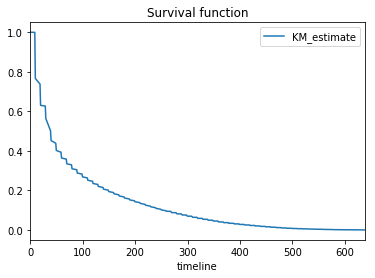

In [90]:

kmf = KaplanMeierFitter()
df["censored"]=1
kmf.fit(df["max_hop"] , df["censored"])
kmf.survival_function_


from matplotlib import pyplot as plt
kmf.survival_function_.plot()
plt.title('Survival function')


In [12]:
kmf = KaplanMeierFitter()
# df.loc[df["mean_val_column"] >= 165,"censored"] = 0
kmf.fit(df["max_hop"] , df["censored"])
kmf.survival_function_

# from matplotlib import pyplot as plt
# kmf.survival_function_.plot()
# plt.title('Survival function_right_censored')


,KM_estimate
timeline,
0.0,1.000000
9.0,0.999339
10.0,0.766203
19.0,0.737516
20.0,0.630250
29.0,0.626448
30.0,0.563711
39.0,0.501345
40.0,0.452063


In [136]:
# df.loc[df["mean_val_column"] >= 165,"censored"] = 0
# df1[df1["censored"]==0]
df1["DeviceOS_value"].value_counts()


Unknown          128512
android           17986
Android            6054
ios                1123
iOS                1064
Windows 7             3
Mac OS X              1
Windows Phone         1
Ubuntu                1
Windows 10            1
Name: DeviceOS_value, dtype: int64

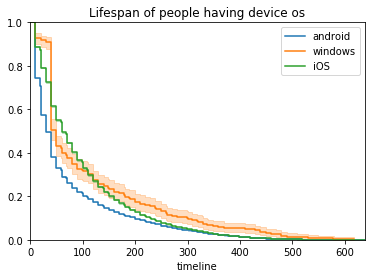

In [187]:
from lifelines.statistics import logrank_test
ax = plt.subplot(111)
os_val1 = df["DeviceOS_value"].isin(["android", "Android"])

kmf.fit(df["max_hop"][os_val1], event_observed=df["censored"][os_val1] ,label="android")
kmf.survival_function_
kmf.plot(ax=ax)

os_val2 = df["DeviceOS_value"].isin(['Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Phone', 'Windows RT',
       'Windows Vista', 'Windows XP'])
kmf.fit(df["max_hop"][os_val2], event_observed=df["censored"][os_val2] , label="windows")
kmf.survival_function_
kmf.plot(ax=ax)

os_val3 = df["DeviceOS_value"].isin(['iOS', 'ios', 'Mac OS X'])
kmf.fit(df["max_hop"][os_val3], event_observed=df["censored"][os_val3] , label="iOS")
kmf.survival_function_
kmf.plot(ax=ax)

results = logrank_test(df["mean_val_column"][os_val1], df["mean_val_column"][os_val2], df["censored"][os_val1], df["censored"][os_val2], alpha=.99)



plt.ylim(0, 1);
plt.title("Lifespan of people having device os");

In [193]:
os_val1 = df["DeviceOS_value"].isin(["android", "Android"])

kmf.fit(df["max_hop"][os_val1], event_observed=df["censored"][os_val1] ,label="android")
kmf.survival_function_

,android
timeline,
0.0,1.000000
9.0,0.999747
10.0,0.745283
19.0,0.705909
20.0,0.575671
29.0,0.572050
30.0,0.497321
39.0,0.438357
40.0,0.382285


In [182]:
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
          82.82 <0.005     63.27


In [65]:
import numpy
numpy.unique(df["gender"])

array(['Female', 'Male', 'O', 'Unknown'], dtype=object)

            female
timeline          
0.0       1.000000
9.0       0.999538
10.0      0.750372
19.0      0.712076
20.0      0.592929
29.0      0.588869
30.0      0.524161
39.0      0.456752
40.0      0.407680
49.0      0.391986
50.0      0.357697
59.0      0.347878
60.0      0.320002
69.0      0.314227
70.0      0.292394
79.0      0.286834
80.0      0.268058
89.0      0.263066
90.0      0.247451
99.0      0.242388
100.0     0.229575
109.0     0.224566
110.0     0.214137
119.0     0.209100
120.0     0.198992
129.0     0.193896
130.0     0.185252
139.0     0.180065
140.0     0.172460
149.0     0.167690
...            ...
468.0     0.012807
469.0     0.011505
478.0     0.011362
479.0     0.010025
488.0     0.009871
489.0     0.008707
498.0     0.008570
499.0     0.007711
508.0     0.007516
509.0     0.006834
518.0     0.006639
519.0     0.005855
528.0     0.005669
529.0     0.005031
538.0     0.004897
539.0     0.004299
548.0     0.004185
549.0     0.003705
558.0     0.003545
559.0     0.

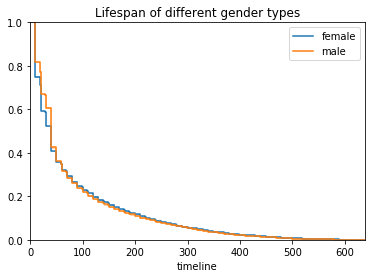

In [195]:
ax = plt.subplot(111)
gen1 = df["gender"].isin(["Female"])

kmf.fit(df["max_hop"][gen1], event_observed=df["censored"][gen1] ,label="female")
kmf.plot(ax=ax)
print(kmf.survival_function_)

gen2 = df["gender"].isin(['Male'])
kmf.fit(df["max_hop"][gen2], event_observed=df["censored"][gen2] , label="male")
kmf.plot(ax=ax)
print(kmf.survival_function_)






plt.ylim(0, 1);
plt.title("Lifespan of different gender types");

In [72]:
gen = df["gender"].isin(["Female"])

In [166]:
from lifelines.statistics import logrank_test
gen1 = df["gender"].isin(["Female"])
gen2 = df["gender"].isin(["Male"])
results = logrank_test(df["mean_val_column"][gen1], df["mean_val_column"][gen2], df["censored"][gen1], df["censored"][gen2], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
         249.09 <0.005    183.99


In [152]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(df["max_hop"],event_observed=df["censored"])

<lifelines.NelsonAalenFitter: fitted with 9.92738e+06 total observations, 0 right-censored observations>

In [184]:
# naf.event_table.sort_values("removed" , ascending=False)
abs(naf.event_table.diff())



,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,NaN,NaN,NaN,NaN,NaN
9.0,6566.0,6566.0,0.0,9927383.0,0.0
10.0,2307858.0,2307858.0,0.0,0.0,6566.0
19.0,2029637.0,2029637.0,0.0,0.0,2314424.0
20.0,780089.0,780089.0,0.0,0.0,284787.0
29.0,1027133.0,1027133.0,0.0,0.0,1064876.0
30.0,585070.0,585070.0,0.0,0.0,37743.0
39.0,3684.0,3684.0,0.0,0.0,622813.0
40.0,129882.0,129882.0,0.0,0.0,619129.0


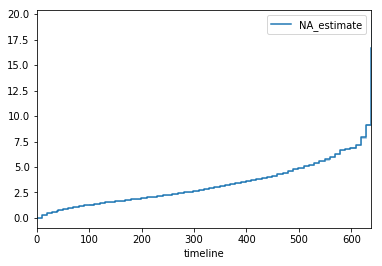

In [153]:

naf.plot()

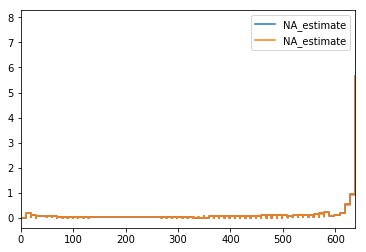

In [166]:
bandwidth=1
ax = naf.plot_hazard(bandwidth=bandwidth)
naf.plot_hazard(ax=ax , bandwidth=bandwidth)

In [ ]:
ax = plt.subplot(111)
gen1 = df["gender"].isin(["Female"])

kmf.fit(df["mean_val_column"][gen1], event_observed=df["censored"][gen1] ,label="female")
kmf.plot(ax=ax)

gen2 = df["gender"].isin(['Male'])
kmf.fit(df["mean_val_column"][gen2], event_observed=df["censored"][gen2] , label="male")
kmf.plot(ax=ax)

gen3 = df["gender"].isin(['Unknown'])
kmf.fit(df["mean_val_column"][gen3], event_observed=df["censored"][gen3] , label="Unknown")
kmf.plot(ax=ax)


In [188]:
gen3 = df["gender"].isin(['Unknown'])
kmf.fit(df["mean_val_column"][gen3], event_observed=df["censored"][gen3] , label="Unknown")
kmf.survival_function_


,Unknown
timeline,
0.0,1.000000
4.0,0.999096
5.0,0.935036
6.0,0.897584
7.0,0.872163
8.0,0.806553
9.0,0.717561
10.0,0.612211
11.0,0.565050
